In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime as dt
import seaborn as sns

In [2]:
data = pd.read_parquet(r'C:\Data\Citibike_NY_2022\merged\df_weather_duration.parquet')

In [3]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,date,AWND,PRCP,TAVG,trip_duration
0,FB33E3D8F21E2941,electric_bike,2022-01-01 01:49:37.374,2022-01-01 01:57:50.346,Canal St & Rutgers St,Norfolk St & Broome St,40.714275,-73.989900,40.717227,-73.988021,casual,2022-01-01,28,193,116,8.216200
1,755337295F178067,electric_bike,2022-01-01 03:21:09.754,2022-01-01 03:49:33.047,Lewis Ave & Madison St,Columbia St & Degraw St,40.686312,-73.935775,40.685930,-74.002424,member,2022-01-01,28,193,116,28.388217
2,C62CA87E3A475ADD,classic_bike,2022-01-01 08:38:18.156,2022-01-01 08:47:54.213,Carlton Ave & Park Ave,Emerson Pl & Myrtle Ave,40.695807,-73.973556,40.693631,-73.962236,casual,2022-01-01,28,193,116,9.600950
3,CD7A2098AFCD5514,classic_bike,2022-01-01 10:33:58.529,2022-01-01 10:47:05.197,W 100 St & Broadway,W 67 St & Broadway,40.797372,-73.970412,40.774925,-73.982666,casual,2022-01-01,28,193,116,13.111133
4,3F9E0C51F49F78A3,electric_bike,2022-01-01 20:05:19.592,2022-01-01 20:12:00.661,W 18 St & 6 Ave,W 42 St & 6 Ave,40.739713,-73.994564,40.754920,-73.984550,member,2022-01-01,28,193,116,6.684483


In [4]:
sns.set_style("darkgrid") # Setting style for all plots 

In [5]:
top20 = data['start_station_name'].value_counts().head(20).rename_axis('start_station_name').reset_index(name='trip_counts')
top20

,start_station_name,trip_counts
0,W 21 St & 6 Ave,128822
1,West St & Chambers St,123045
2,Broadway & W 58 St,114040
3,6 Ave & W 33 St,106236
4,1 Ave & E 68 St,104685
5,Broadway & E 14 St,98656
6,Broadway & W 25 St,98237
7,University Pl & E 14 St,96938
8,Broadway & E 21 St,95532
9,W 31 St & 7 Ave,94030


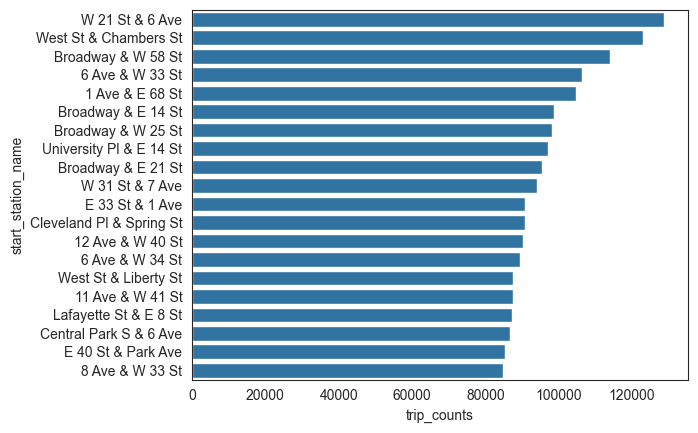

In [6]:
# bar chart for top 20 starting stations, removing grey grid background for this plot
with sns.axes_style('white'):
    sns.barplot(data=top20,
            x = 'trip_counts',
            y = 'start_station_name')

In [8]:
# Creating grouped df where each row is a day with number of trips aggregated - avoids millions of rows unnecessarily
    # Keeping all three weather variables and renaming them
df_weather = ( data.groupby('date')
      .agg(
          trip_count = ('date', 'size'),
          temperature = ('TAVG', 'first'),
          precipitation = ('PRCP', 'first'),
          wind = ('AWND', 'first')
      )
          .reset_index()
          .copy()
)

In [9]:
df_weather.head()

,date,trip_count,temperature,precipitation,wind
0,2022-01-01,20428,116,193,28
1,2022-01-02,43009,114,10,43
2,2022-01-03,33189,14,0,64
3,2022-01-04,36842,-27,0,39
4,2022-01-05,34230,32,61,34


In [10]:
# setting date as index
df_weather.set_index('date', inplace=True)

In [11]:
df_weather['temperature'] = df_weather['temperature']/10 # changing temperature to °C


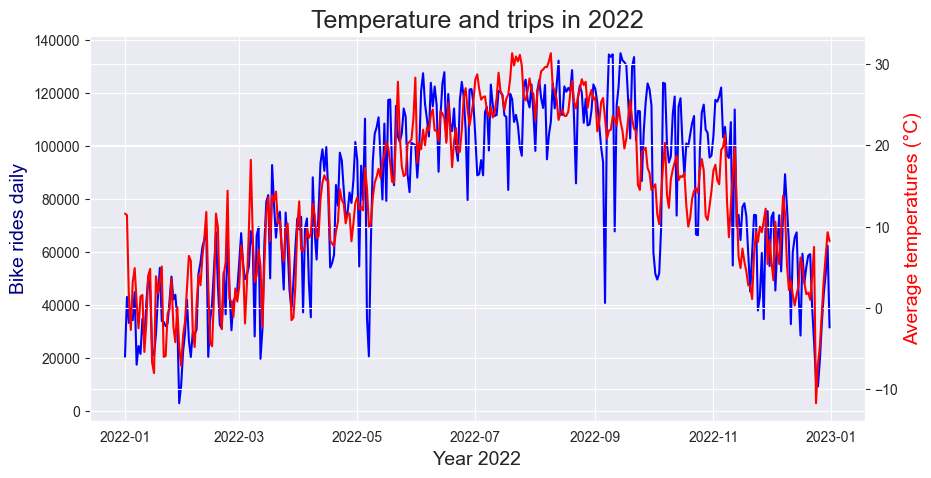

In [12]:
# dual axis graph of number of trips and temperature
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_weather['trip_count'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df_weather['temperature'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures (°C)", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

In [13]:
# Count the categories of two cat vars to plot
member_counts = data['member_casual'].value_counts()
rideable_counts = data['rideable_type'].value_counts()

In [14]:
member_counts

member_casual
member    23257501
casual     6580665
Name: count, dtype: int64

In [15]:
df = data.copy()

In [ ]:
# dropping outlier trips longer than 100 mins and duration less than 0 mins
df = df[df['trip_duration'] < 100].copy()
df.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,date,AWND,PRCP,TAVG,trip_duration
count,29618799,29618799,2.961880e+07,2.961880e+07,2.961795e+07,2.961795e+07,29618799,2.961880e+07,2.961880e+07,2.961880e+07,2.961880e+07
mean,2022-07-18 09:43:26.905425408,2022-07-18 09:57:18.125647616,4.074055e+01,-7.397526e+01,4.074033e+01,-7.397536e+01,2022-07-17 19:09:22.944570624,4.494743e+01,2.367071e+01,1.711322e+02,1.385367e+01
min,2022-01-01 00:00:13.532000,2022-01-01 00:02:15.504000,4.062737e+01,-7.402802e+01,4.057000e+01,-7.428000e+01,2022-01-01 00:00:00,1.700000e+01,0.000000e+00,-1.170000e+02,1.488333e-01
25%,2022-05-14 16:20:45.716999936,2022-05-14 16:35:10.171500032,4.071606e+01,-7.399379e+01,4.071602e+01,-7.399380e+01,2022-05-14 00:00:00,3.400000e+01,0.000000e+00,1.140000e+02,5.768967e+00
50%,2022-07-23 04:18:14.416999936,2022-07-23 04:32:54.888000,4.073936e+01,-7.398166e+01,4.073932e+01,-7.398169e+01,2022-07-23 00:00:00,4.200000e+01,0.000000e+00,1.790000e+02,1.008418e+01
75%,2022-09-26 15:20:34.436000,2022-09-26 15:34:37.885499904,4.076319e+01,-7.395928e+01,4.076313e+01,-7.395943e+01,2022-09-26 00:00:00,5.200000e+01,8.000000e+00,2.410000e+02,1.773608e+01
max,2022-12-31 23:58:19.206000,2022-12-31 23:59:55.708000,4.088398e+01,-7.387859e+01,4.106000e+01,-7.379000e+01,2022-12-31 00:00:00,1.090000e+02,4.500000e+02,3.130000e+02,9.999993e+01
std,NaN,NaN,3.887370e-02,2.578373e-02,3.881213e-02,2.580076e-02,NaN,1.534958e+01,6.068144e+01,8.555032e+01,1.229772e+01


In [26]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'end_station_name', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'date', 'AWND', 'PRCP', 'TAVG',
       'trip_duration'],
      dtype='object')

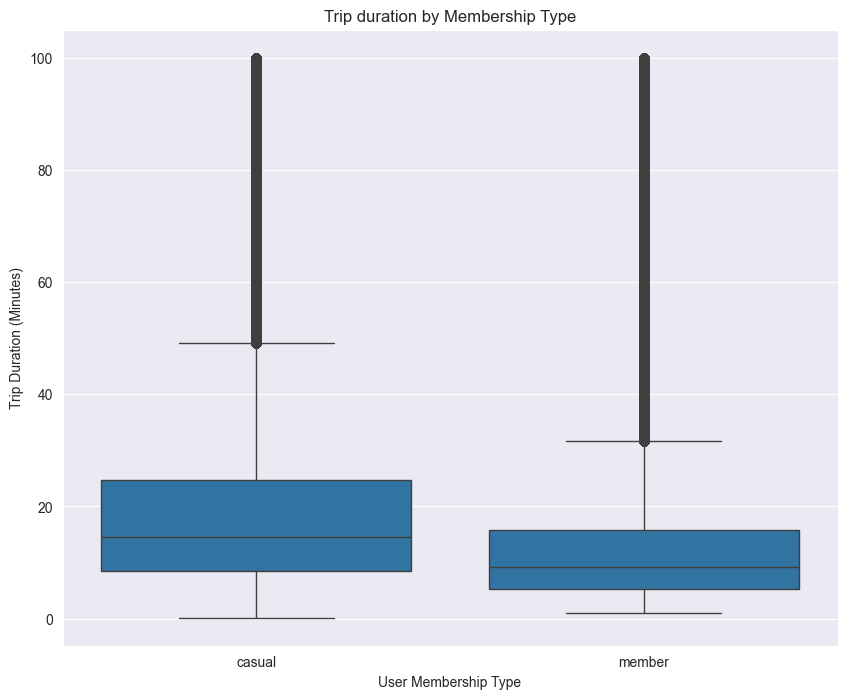

In [20]:
# boxplot of trip duration by membership type
plt.figure(figsize = (10, 8))

sns.boxplot(data=df,
                  x = 'member_casual',
                  y = 'trip_duration')
plt.title('Trip duration by Membership Type')
plt.xlabel('User Membership Type')
plt.ylabel('Trip Duration (Minutes)')

plt.show()

Overall, we can see from the quartile ranges and the medians that casual members tend to have longer journeys than members. We also see greater variance when it comes to the trip duration of casual members, whereas rides from members are more consistent

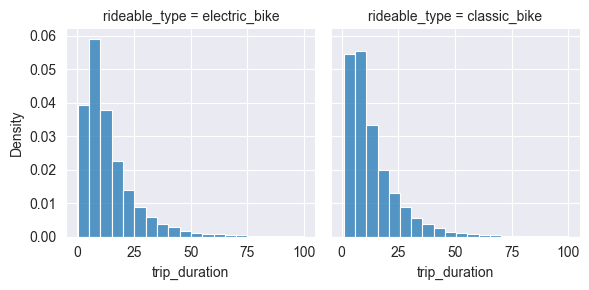

In [21]:
# facetted histogram plots of trip duration by vehicle type
grid = sns.FacetGrid(df, col = "rideable_type")

grid.map(sns.histplot,
         "trip_duration",
         bins=20,
         stat="density",
         common_norm=False)

All ride types generally tend toward shorter trips with 0-5 and 5-10 being most common jouney durations. Looking at rideable types, the classic bikes have proportionally more rides in the 0-5 minute range, whereas with electric bikes 5-10 minutes is more clearly the most common trip duration. Both groups tail off in similar patterns after the 20 minute bin, however the classic bike rides tail off a bit quicker. This could potentially be due to fatigue or planned journey type, i.e., people select a classic bike if they know it's shorter distance to travel.

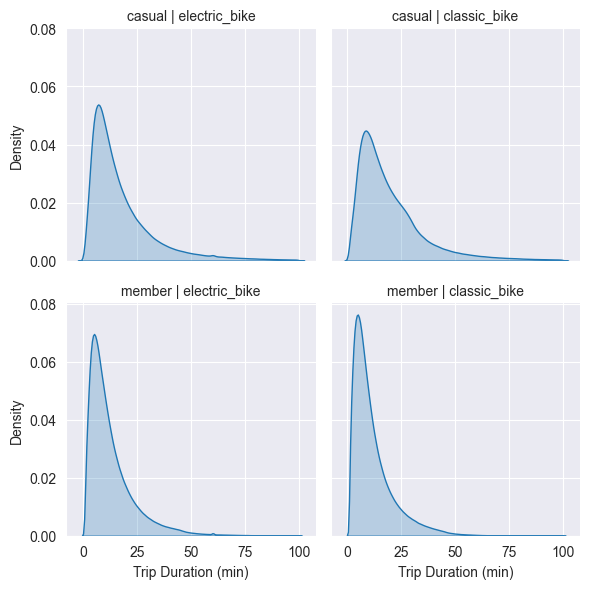

In [22]:
# Now incorporating membership type also
g = sns.FacetGrid(df, 
                  row="member_casual", 
                  col="rideable_type")

g.map_dataframe(sns.kdeplot, 
                "trip_duration", 
                fill=True)

g.set_axis_labels("Trip Duration (min)", "Density")
g.set_titles(row_template="{row_name}", col_template="{col_name}")

plt.tight_layout()
plt.show()

Comparing these density plots, we see that members (bottom row) overall take shorter rides than casual users. Casual users are more likely to go on longer journeys. This maybe suggests they're using the bikes for recreational trips whereas members use them more for shorts commutes or errands. 
Amongst casual users, we see that they tend to have longer journeys generally, but also that when using the electric bikes we really see an increase in these longer trips. But with members, the bike type doesnt make a huge difference - both spiking quite early. This suggests these member users use the bikes for consistent short-duration purposes